# Filtering

Get ImageJ read and prepare Image.

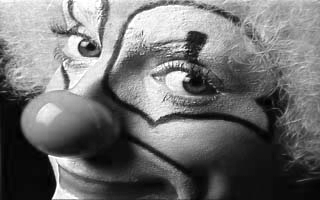

In [1]:
#@ImageJ ij
import net.imglib2.FinalInterval
import net.imglib2.RandomAccessibleInterval

// Define some handy shorhands!
tile = { images ->
  int[] gridLayout = images[0] in List ?
    [images[0].size, images.size] : // 2D images list
    [images.size] // 1D images list
  RandomAccessibleInterval[] rais = images.flatten()
  ij.notebook().mosaic(gridLayout, rais)
}

// Prepare image
image = ij.io().open("http://imagej.net/images/clown.png")
w = image.dimension(0); h = image.dimension(1)
slice = FinalInterval.createMinSize(0, 0, 0, w, h, 1)

// Crop to only red channel left
grayImage = ij.op().run("crop", image, slice, true)
image32 = ij.op().convert().float32(grayImage)

There are lots of image filtering operations available in the `filter` namespace:

In [2]:
ij.op().ops().findAll{op ->
  op.startsWith("filter.")
}.collect{op -> op[7..-1]}

addNoise
addPoissonNoise
allPartialDerivatives
bilateral
convolve
correlate
createFFTOutput
dog
fft
fftSize
frangiVesselness


Here is a demonstration of some of them:

In [3]:
ij.op().help("filter.addPoissonNoise")

Available operations:
	(RealType out) =
	net.imagej.ops.filter.addPoissonNoise.AddPoissonNoiseRealType(
		RealType out,
		RealType in,
		long seed?)
	(IterableInterval out) =
	net.imagej.ops.filter.addPoissonNoise.AddPoissonNoiseMap(
		IterableInterval out,
		IterableInterval in)

In [4]:
imageToFilter = image32
radius = 3

// We will use a 3x3 diamond as our neighborhood here.
import net.imglib2.algorithm.neighborhood.DiamondShape
shape = new DiamondShape(radius)

// Add Poisson noise.
addPoissonNoise = ij.op().run("create.img", imageToFilter)
ij.op().filter().addPoissonNoise(addPoissonNoise, imageToFilter)

// Gaussian blur.
gauss = ij.op().filter().gauss(imageToFilter, radius)

// Median filter.
median = ij.op().run("create.img", imageToFilter)
ij.op().filter().median(median, imageToFilter, shape)

// Min filter.
min = ij.op().run("create.img", imageToFilter)
ij.op().filter().min(min, imageToFilter, shape)

// Max filter.
max = ij.op().run("create.img", imageToFilter)
ij.op().filter().max(max, imageToFilter, shape)

// Sobel filter.
sobel = ij.op().filter().sobel(imageToFilter)

// Display the results side by side.
[
    [["image":imageToFilter, "poissonNoise":addPoissonNoise, "gauss":gauss, "Sobel":sobel]],
    [["median":median,"min":min,"max":max]]
]

image,poissonNoise,gauss,Sobel


Finally, let's take a special look at the Difference of Gaussians op, `filter.dog`:

### Image features

In [5]:
imageToProcess = image32
sigma1 = 5
sigma2 = 10

// Difference of Gaussians.
dog = ij.op().filter().dog(imageToProcess, sigma1, sigma2) // gauss(sigma2) - gauss(sigma1)

// We can also use eval to perform the DoG.
vars = [
  "i": imageToProcess,
  "sigma1": [sigma1, sigma1],
  "sigma2": [sigma2, sigma2]
]
evalDoG = ij.op().eval("gauss(i, sigma2) - gauss(i, sigma1)", vars)

[["dog":dog, "evalDoG":evalDoG]]

dog,evalDoG
